## Assignment2 - Supervised Learning flow

### Part 1 - Student details:
* Please write the First Name and last 4 digits of the i.d. for each student. For example:
<pre>Israel 9812</pre>

In [3]:
# student 1:Yonatan 3212
# student 2:Mor 3239
# student 3:Yevgenia 3208
# student 4:Adi 3186
# student 5:Sahar 2091
# (optional) student 6:

## Part 2 - Experiments
You could add as many code cells as needed

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, OneHotEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, make_scorer

In [7]:

train_file_path = 'wine_train.csv'
test_file_path = 'wine_test.csv'

train_df = pd.read_csv(train_file_path)
test_df = pd.read_csv(test_file_path)

print("Train Set:")
print(train_df.head())

print("\nTest Set:")
print(test_df.head())


Train Set:
   alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    12.08        1.83  2.32               18.5       81.0           1.60   
1    13.58        2.58  2.69               24.5      105.0           1.55   
2    12.37        0.94  1.36               10.6       88.0           1.98   
3    11.82        1.72  1.88               19.5       86.0           2.50   
4    13.16        3.57  2.15               21.0      102.0           1.50   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        1.50                  0.52             1.64             2.40  1.08   
1        0.84                  0.39             1.54             8.66  0.74   
2        0.57                  0.28             0.42             1.95  1.05   
3        1.64                  0.37             1.42             2.06  0.94   
4        0.55                  0.43             1.30             4.00  0.60   

   od280/od315_of_diluted_wines  proline  target  


Train Data Statistics:           alcohol  malic_acid         ash  alcalinity_of_ash   magnesium  \
count  142.000000  142.000000  142.000000         142.000000  142.000000   
mean    12.997254    2.297746    2.361690          19.419718   99.943662   
std      0.789931    1.093317    0.283231           3.354815   13.683751   
min     11.410000    0.740000    1.360000          10.600000   78.000000   
25%     12.370000    1.592500    2.222500          17.250000   88.000000   
50%     13.050000    1.865000    2.360000          19.250000   98.000000   
75%     13.637500    3.020000    2.557500          21.375000  108.000000   
max     14.750000    5.650000    3.230000          30.000000  151.000000   

       total_phenols  flavanoids  nonflavanoid_phenols  proanthocyanins  \
count     142.000000  142.000000            142.000000       142.000000   
mean        2.315986    2.063592              0.346690         1.561901   
std         0.639469    1.005302              0.117562         0.54

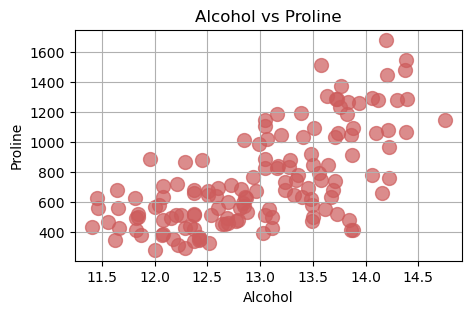

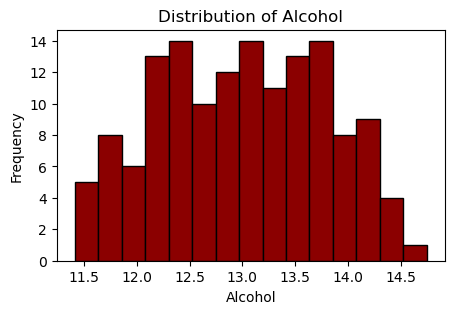

In [8]:
train_stats = train_df.describe()
print("Train Data Statistics:",train_stats)         # חישוב סטטיסטיקות עבור המשתנים המספריים בנתוני האימון

corr_matrix = train_df.corr() 
print("\nCorrelation Matrix:\n",corr_matrix)           # חישוב מטריצת הקורלציה של נתוני האימון

print("\nTrain Data Info:")                           # הדפסת מידע על נתוני האימון
print(train_df.info())

print("\nTest Data Info:")                             # הדפסת מידע כללי על נתוני הבדיקה
print(test_df.info())

plt.figure(figsize=(5, 3))
plt.scatter(train_df['alcohol'], train_df['proline'], alpha=0.7, s=100, color='Indianred')
plt.title('Alcohol vs Proline')
plt.xlabel('Alcohol')
plt.ylabel('Proline')
plt.grid(True)
plt.show()                                             #עבור אחוז אלכוהול והפרולין scatterplot יצירת דיאגרמת 

plt.figure(figsize=(5, 3))
plt.hist(train_df['alcohol'], bins=15, color='Darkred', edgecolor='black')
plt.title('Distribution of Alcohol')
plt.xlabel('Alcohol')
plt.ylabel('Frequency')
plt.show()                                             # יצירת היסטוגרמה עבור שכיחות אחוזי האלכהול

In [7]:
train_labels = train_df['target']
test_labels = test_df['target']
train_features = train_df.drop(columns=['target'])
test_features = test_df.drop(columns=['target'])

numeric_features = train_features.select_dtypes(include=[np.number]).columns.tolist()
scaler = StandardScaler()
train_features[numeric_features] = scaler.fit_transform(train_features[numeric_features])
test_features[numeric_features] = scaler.transform(test_features[numeric_features])

categorical_features = train_features.select_dtypes(include=['object']).columns.tolist()
if categorical_features:
    encoder = OneHotEncoder(sparse=False, drop='first')
    encoded_train = pd.DataFrame(encoder.fit_transform(train_features[categorical_features]), columns=encoder.get_feature_names_out(categorical_features))
    encoded_test = pd.DataFrame(encoder.transform(test_features[categorical_features]), columns=encoder.get_feature_names_out(categorical_features))
    
    train_features = pd.concat([train_features, encoded_train], axis=1)
    test_features = pd.concat([test_features, encoded_test], axis=1)
    
    train_features.drop(columns=categorical_features, inplace=True)
    test_features.drop(columns=categorical_features, inplace=True)

poly = PolynomialFeatures(degree=2, include_bias=False)
poly_train_features = poly.fit_transform(train_features)
poly_test_features = poly.transform(test_features)

X_train = poly_train_features
X_test = poly_test_features
y_train = train_labels
y_test = test_labels

In [8]:
knn_model = KNeighborsClassifier()
param_grid_knn = {
    'n_neighbors': [3, 5, 7],
    'weights': ['uniform', 'distance'],
}
grid_search_knn = GridSearchCV(estimator=knn_model, param_grid=param_grid_knn, cv=5, scoring='accuracy')
grid_search_knn.fit(X_train, y_train)

print("Best Parameters for KNN:", grid_search_knn.best_params_)

Best Parameters for KNN: {'n_neighbors': 7, 'weights': 'uniform'}


In [9]:
tree_model = DecisionTreeClassifier()
param_grid_tree = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 10, 20]
}
grid_search_tree = GridSearchCV(estimator=tree_model, param_grid=param_grid_tree, cv=5, scoring='accuracy')
grid_search_tree.fit(X_train, y_train)

best_params_tree = grid_search_tree.best_params_

best_params_tree

{'max_depth': 20, 'min_samples_split': 10}

In [10]:
macro_f1_scorer = make_scorer(f1_score, average='macro')

feature_eng_options = ['option1', 'option2']
model_options = ['KNN', 'Decision Tree']
hyperparameters = {
    'KNN': {'n_neighbors': [3, 5, 7], 'weights': ['uniform', 'distance']},
    'Decision Tree': {'max_depth': [None, 10, 20, 30], 'min_samples_split': [2, 10, 20]}
}

results_list = []

for fe_option in feature_eng_options:
    for model_option in model_options:
        if model_option == 'KNN':
            model = KNeighborsClassifier()
        elif model_option == 'Decision Tree':
            model = DecisionTreeClassifier()
        param_grid = hyperparameters[model_option]
        
        grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring=macro_f1_scorer)
        grid_search.fit(X_train, y_train)
        
        best_score = grid_search.best_score_
        best_params = grid_search.best_params_
        
        results_list.append({'Feature Engineering': fe_option,
                             'Model': model_option,
                             'Hyperparameters': best_params,
                             'Macro-average-f1': best_score})

results_df = pd.DataFrame(results_list)

print(results_df)

  Feature Engineering          Model  \
0             option1            KNN   
1             option1  Decision Tree   
2             option2            KNN   
3             option2  Decision Tree   

                              Hyperparameters  Macro-average-f1  
0    {'n_neighbors': 7, 'weights': 'uniform'}          0.937020  
1   {'max_depth': 30, 'min_samples_split': 2}          0.891706  
2    {'n_neighbors': 7, 'weights': 'uniform'}          0.937020  
3  {'max_depth': 20, 'min_samples_split': 20}          0.880457  


## Part 3 - Training flow
Use the best combination of feature engineering, model (algorithm and hyperparameters) from the experiment part (part 2)

In [18]:
best_combination = results_df.loc[results_df['Macro-average-f1'].idxmax()]

if best_combination['Model'] == 'KNN':
    model = KNeighborsClassifier(**best_combination['Hyperparameters'])
elif best_combination['Model'] == 'Decision Tree':
    model = DecisionTreeClassifier(**best_combination['Hyperparameters'])

model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=7)

## Part 4 - Apply on test and show model performance estimation

In [19]:
test_predictions = model.predict(X_test)

test_accuracy = accuracy_score(y_test, test_predictions)
test_f1_macro = f1_score(y_test, test_predictions, average='macro')

print("Test Accuracy:", test_accuracy)
print("Test Macro-average F1 Score:", test_f1_macro)

Test Accuracy: 0.8888888888888888
Test Macro-average F1 Score: 0.8899516908212561
